### **Importing libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


### **Setting values**

In [ ]:
test_size = 0.2
learning_rate = 0.01
epochs = 200
batch = 10

### **Loading dataset**

In [ ]:
df = pd.read_csv("/content/boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<Axes: >

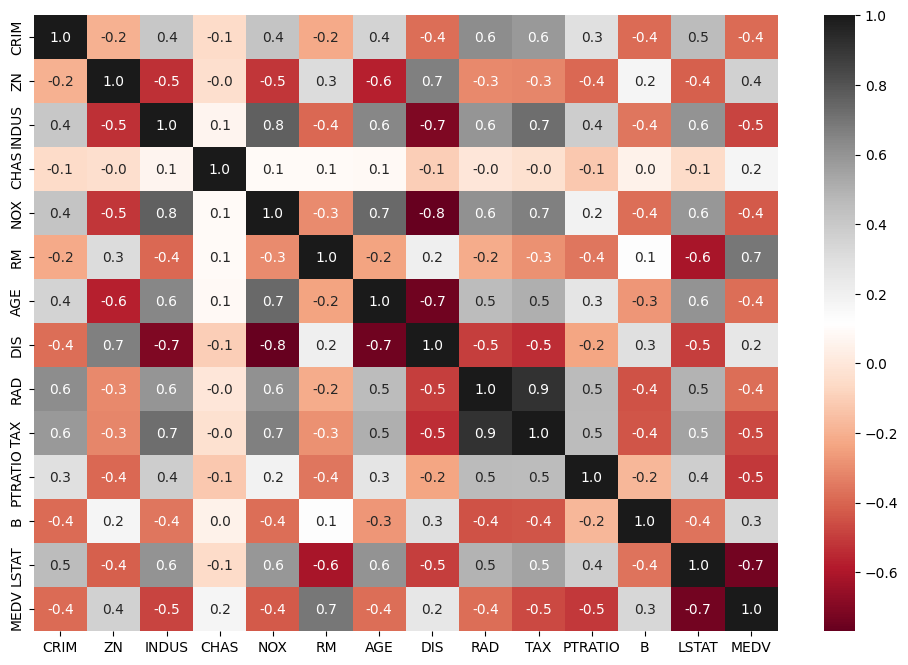

In [ ]:
df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),cmap = 'RdGy', annot = True, fmt = '.1f')

### **Preprocess dataset**

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### **Seperating dependent (y) and independent (x) variables**

In [ ]:
X = df.drop('MEDV', axis = 1)
Y = df.MEDV

print(X.shape,Y.shape)

(506, 13) (506,)


### **Splitting training and testing dataset**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.20, random_state = 0)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print('Y_test', Y_test.shape)

X_train (404, 13)
Y_train (404,)
X_test (102, 13)
Y_test (102,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Creating and training model**

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

In [ ]:

model.compile(
optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
loss=tf.keras.losses.MeanSquaredError(),
metrics=tf.keras.metrics.MeanSquaredError()
)
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, verbose=True)

Epoch 1/200
41/41 [==============================] - 1s 2ms/step - loss: 140.8360 - mean_squared_error: 140.8360
Epoch 2/200
41/41 [==============================] - 0s 2ms/step - loss: 86.4883 - mean_squared_error: 86.4883
Epoch 3/200
41/41 [==============================] - 0s 2ms/step - loss: 88.7052 - mean_squared_error: 88.7052
Epoch 4/200
41/41 [==============================] - 0s 2ms/step - loss: 76.2373 - mean_squared_error: 76.2373
Epoch 5/200
41/41 [==============================] - 0s 2ms/step - loss: 66.2126 - mean_squared_error: 66.2126
Epoch 6/200
41/41 [==============================] - 0s 2ms/step - loss: 67.8554 - mean_squared_error: 67.8554
Epoch 7/200
41/41 [==============================] - 0s 2ms/step - loss: 67.2410 - mean_squared_error: 67.2410
Epoch 8/200
41/41 [==============================] - 0s 2ms/step - loss: 58.3343 - mean_squared_error: 58.3343
Epoch 9/200
41/41 [==============================] - 0s 2ms/step - loss: 60.0270 - mean_squared_error: 60.0270

### **Evaluating model**

4/4 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Test vs Prediction')

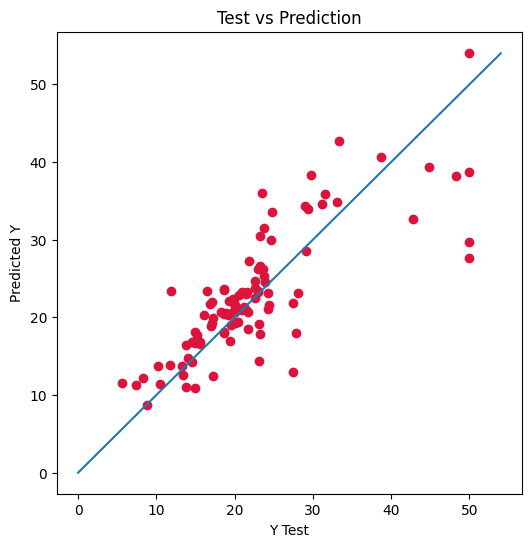

In [ ]:
pred = model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, pred, c='crimson')
plt.plot(range(int(max(max(Y_test), max(pred)[0]))+1))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')

In [ ]:
from sklearn.metrics import mean_squared_error
Y_predict = model.predict(X_test)
mse = mean_squared_error(Y_predict,Y_test)
mse

4/4 [==============================] - 0s 3ms/step


29.86282804798247

In [ ]:
print('The MSE value is: ', model.evaluate(X_test, Y_test, verbose=False)[0])

The MSE value is:  29.862829208374023
